# Análisis Visual
En esta parte del proyecto se realizarán varias gráficas de la base de datos con el objetivo de mejor la visualización y presentación de los datos.

## Carga de la Base de Datos
A partir de esta actividad, se decidió eliminar una de las columnas del documento *csv* por no tener datos completos.

In [222]:
import pandas as pd
df = pd.read_csv('../Laboratorio_A01706695/archive/cwurData.csv')
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,651,44.02,2015


## Exploración de datos
Similar al trabajo anterior, esta exploración nos permite conocer más acerca del tipo de datos con los que se pueden trabajar

### Uso de .info()

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  patents               2200 non-null   int64  
 11  score                 2200 non-null   float64
 12  year                  2200 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 223.6+ KB


Gracias a esta función, se pueden observar las columnas, la cantidad y el tipo de datos que nuestra base de datos posee.   
Este análisis muestra que la mayoría de los datos presentes son de tipo **entero**; se poseen dos datos del tipo **objeto** para las columnas de *institution* y *country*, con la elmiminación de una columna, ahora solamente hay una columna con datos de tipo **flotante** para la categoría *score*.

### Uso de .count()

Lo siguiente muestra la cantidad de valores que hay para comprobar si hay *valores vacíos*.

In [224]:
df.count()

world_rank              2200
institution             2200
country                 2200
national_rank           2200
quality_of_education    2200
alumni_employment       2200
quality_of_faculty      2200
publications            2200
influence               2200
citations               2200
patents                 2200
score                   2200
year                    2200
dtype: int64

### Uso de len()

In [225]:
len(df)

2200

Para poder conocer el top 10 de los países, se decidió filtrar la información por años, como se observa a continuación.

In [226]:
t2012 = df[(df['world_rank'] <= 10) & (df['year'] == 2012)]
t2013 = df[(df['world_rank'] <= 10) & (df['year'] == 2013)]
t2014 = df[(df['world_rank'] <= 10) & (df['year'] == 2014)]
t2015 = df[(df['world_rank'] <= 10) & (df['year'] == 2015)]

### Comparación entre mínimos y máximos del top 10

In [227]:
t2012['score'].min(), t2012['score'].max()

(78.55, 100.0)

In [228]:
t2013['score'].min(), t2013['score'].max()

(78.83, 100.0)

In [229]:
t2014['score'].min(), t2014['score'].max()

(88.11, 100.0)

In [230]:
t2015['score'].min(), t2015['score'].max()

(86.79, 100.0)

## Análisis gráfico

Se mandan a llamar las librerías:

In [231]:
import seaborn as sb
import numpy as np; np.random.seed(0)
from matplotlib import cm
from matplotlib import pyplot as plt

### Top 10 de Universidades

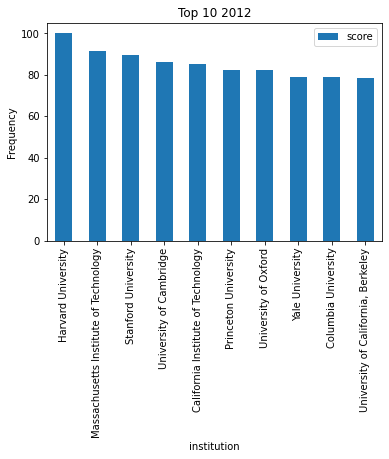

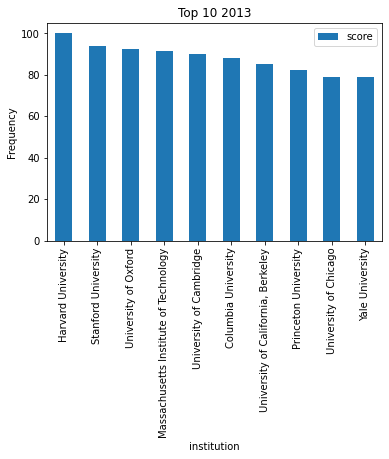

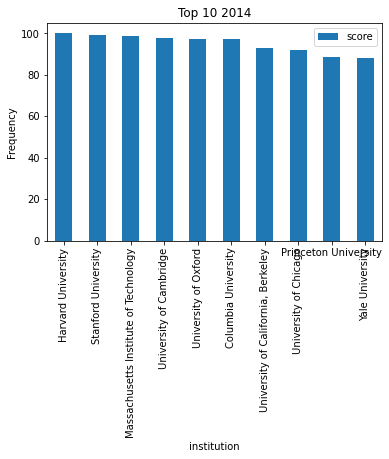

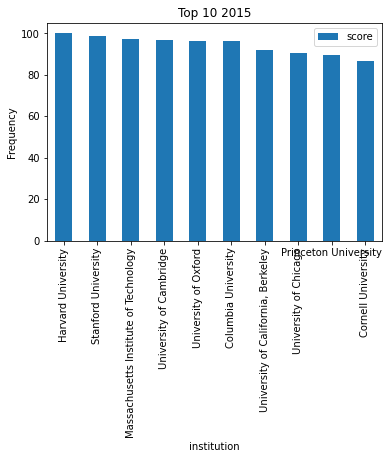

In [232]:
t2012[['institution', 'score']].plot.hist()
t2012.set_index('institution')['score'].plot(kind='bar')
plt.title('Top 10 2012')

t2013[['institution', 'score']].plot.hist()
t2013.set_index('institution')['score'].plot(kind='bar')
plt.title('Top 10 2013')

t2014[['institution', 'score']].plot.hist()
t2014.set_index('institution')['score'].plot(kind='bar')
plt.title('Top 10 2014')

t2015[['institution', 'score']].plot.hist()
t2015.set_index('institution')['score'].plot(kind='bar')
plt.title('Top 10 2015')

plt.show()

De las gráficas se puede observar cómo la "Universidad de Harvard" se mantuvo en primera posición en todos estos años y también la entrada y salida de universidades a este *top 10*; gracias a que estas fueron graficadas junto con su puntaje, también puede observarse que el nivel académico de cada una de estas universidades tiende a eleverse a partir del 2013.

### Países registrados

Para poder apreciar qué país tiene mayor presencia, se crearon este tipo de gráficas por año.

Text(0.5, 1.0, 'Universidades Registradas por país en 2012')

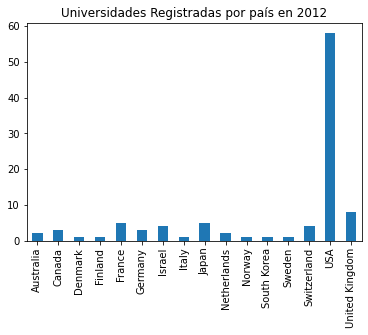

In [233]:
tot2012 = df[(df['year'] == 2012)]

tot2012['country'].value_counts().sort_index().plot(kind='bar')
plt.title('Universidades Registradas por país en 2012')

Text(0.5, 1.0, 'Universidades Registradas por país en 2013')

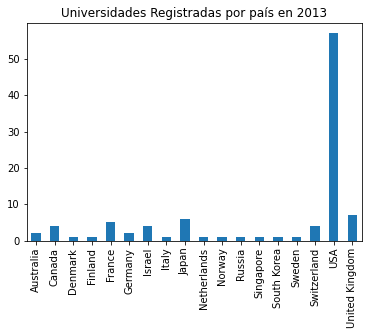

In [234]:
tot2013 = df[(df['year'] == 2013)]

tot2013['country'].value_counts().sort_index().plot(kind='bar')
plt.title('Universidades Registradas por país en 2013')

Text(0.5, 1.0, 'Universidades Registradas por país en 2014')

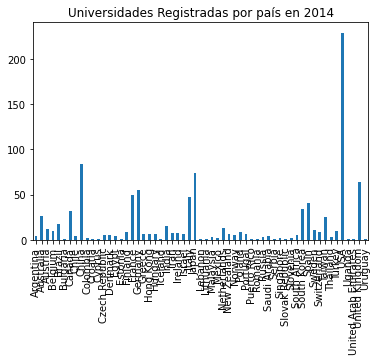

In [235]:
tot2014 = df[(df['year'] == 2014)]

tot2014['country'].value_counts().sort_index().plot(kind='bar')
plt.title('Universidades Registradas por país en 2014')

Text(0.5, 1.0, 'Universidades Registradas por país en 2015')

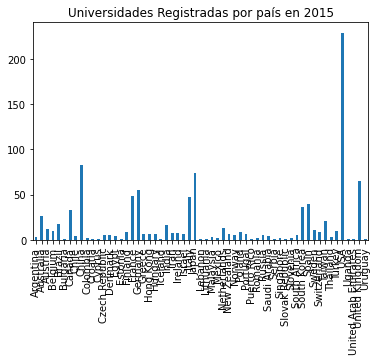

In [236]:
tot2015 = df[(df['year'] == 2015)]

tot2015['country'].value_counts().sort_index().plot(kind='bar')
plt.title('Universidades Registradas por país en 2015')

Haciendo estas gráficas, puede apreciarse cómo, a partir del penúltimo año, el registro de Universidades por parte de diferentes países aumentó.   
Si bien estos datos aumentaron, gracias a esta visualización, puede observarse que EE.UU. tiene el mayo registro de sus Universidades, mientras que países como Uruguay, solamente cuenta con un sólo registro.

Gracias a la visualización de los datos, se ha decidido comenzar a delimitar la información con la que se trabaja a la registrada en el año ***2015***.